In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os, sys
import torch

sys.path.insert(0, '../src')
sys.path.insert(0, '..')
import db_utils, utils, visualizations
from models.config import Config, IMAGE_TOKEN_IDS
from main import get_model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/n/fs/ac-project/anaconda3/envs/vlm-lens-base/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
default_config_path = "../configs/models/qwen/TaskSensitivity/Qwen2-VL-7B-Instruct-TaskSensitivity-Default.yaml"
overwrite_configs = True
prompts = [
    "This is an image.",
    "What are the (x, y) coordinates of this person's left eye?",
    "What is the color of this person's clothes?",
    "What is the person's hair texture?",
    "What is the name of this hairstyle?",
    "Where was this photo taken?",
    "Who is this person?",
    "What country is this person from?",
    "What does (or did) this person do for a living?",
    "Who is this person's mother?",
    "What is this person's country most known for?"
]

prompts_short = [
    "None",
    "Image",
    "Coordinates",
    "Color",
    "Hair Texture",
    "Hairstyle",
    "Where",
    "Who",
    "Country",
    "Job",
    "Mother",
    "Country Reputation"
]
config = utils.read_file(default_config_path)

config_paths = [default_config_path]
# Make config files
for idx, prompt in enumerate(prompts):
    if idx == 0:
        default_output_path = config['output_db']
    config['prompt'] = prompt
    config['output_db'] = default_output_path.replace("Default", "Prompt_{}".format(idx+1))
    save_path = default_config_path.replace("Default", "Prompt_{}".format(idx+1))
    utils.write_file(config, save_path, overwrite=overwrite_configs)
    config_paths.append(save_path)

print(len(config_paths)) # 1 default + 10 prompts

Saved file to ../configs/models/qwen/TaskSensitivity/Qwen2-VL-7B-Instruct-TaskSensitivity-Prompt_1.yaml
Saved file to ../configs/models/qwen/TaskSensitivity/Qwen2-VL-7B-Instruct-TaskSensitivity-Prompt_2.yaml
Saved file to ../configs/models/qwen/TaskSensitivity/Qwen2-VL-7B-Instruct-TaskSensitivity-Prompt_3.yaml
Saved file to ../configs/models/qwen/TaskSensitivity/Qwen2-VL-7B-Instruct-TaskSensitivity-Prompt_4.yaml
Saved file to ../configs/models/qwen/TaskSensitivity/Qwen2-VL-7B-Instruct-TaskSensitivity-Prompt_5.yaml
Saved file to ../configs/models/qwen/TaskSensitivity/Qwen2-VL-7B-Instruct-TaskSensitivity-Prompt_6.yaml
Saved file to ../configs/models/qwen/TaskSensitivity/Qwen2-VL-7B-Instruct-TaskSensitivity-Prompt_7.yaml
Saved file to ../configs/models/qwen/TaskSensitivity/Qwen2-VL-7B-Instruct-TaskSensitivity-Prompt_8.yaml
Saved file to ../configs/models/qwen/TaskSensitivity/Qwen2-VL-7B-Instruct-TaskSensitivity-Prompt_9.yaml
Saved file to ../configs/models/qwen/TaskSensitivity/Qwen2-VL-7B

In [37]:
overwrite = False
debug = False
npy_dirs = []
for config_path in config_paths:
    sys.argv = ['notebooks/task_sensitivity.ipynb',
            '--config', config_path]
    config = Config()
    npy_dir = os.path.splitext(config.output_db)[0]
    npy_dirs.append(npy_dir)
    if not overwrite and os.path.exists(config.output_db) and os.path.exists(npy_dir):
        utils.informal_log("Output files and directory exist and not overwriting")
        continue

    model = get_model(config.architecture, config)


    n_modules = 0
    layer_names = []
    for name, module in model.model.named_modules():
        if model.config.matches_module(name):
            if debug:
                print(name)
            layer_names.append(name)
            n_modules += 1
    utils.informal_log("{} modules matched".format(n_modules))

    # Check if file exists
    if os.path.exists(config.output_db) and not overwrite:
        utils.informal_log("File exists at {} and not overwriting".format(config.output_db))
    else:
        model.run(save_tokens=False)

    # Check if .npy files exist

    if os.path.exists(npy_dir) and not overwrite:
        utils.informal_log("Dir exists at {} and not overwriting".format(npy_dir))
    else:
        db_utils.save_embeddings_npy(
            db_path=config.output_db,
            layer_names=layer_names,
            overwrite=overwrite)
    if debug:

        break

Loading checkpoint shards: 100%|██████████| 5/5 [00:00<00:00, 28.80it/s]


[1031_100442] 9 modules matched


Running forward hooks on data: 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]


Could not squeeze embeddings into 2D array: tuple index out of range
[1031_100448] Could not save input IDs


 56%|█████▌    | 5/9 [00:00<00:00, 42.87it/s]

Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Default/visual.merger.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Default/model.layers.0.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Default/model.layers.5.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Default/model.layers.10.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Default/model.layers.15.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Default/model.layers.20.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Default/model.layers.25.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Default/model.layers.27.npy


100%|██████████| 9/9 [00:00<00:00, 43.12it/s]

Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Default/model.norm.npy



Loading checkpoint shards: 100%|██████████| 5/5 [00:00<00:00, 33.46it/s]


[1031_100450] 9 modules matched


Running forward hooks on data: 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]


Could not squeeze embeddings into 2D array: tuple index out of range
[1031_100456] Could not save input IDs


 56%|█████▌    | 5/9 [00:00<00:00, 44.35it/s]

Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_1/visual.merger.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_1/model.layers.0.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_1/model.layers.5.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_1/model.layers.10.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_1/model.layers.15.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_1/model.layers.20.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_1/model.layers.25.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_1/model.layers.27.npy


100%|██████████| 9/9 [00:00<00:00, 44.70it/s]

Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_1/model.norm.npy



Loading checkpoint shards: 100%|██████████| 5/5 [00:00<00:00, 34.00it/s]


[1031_100458] 9 modules matched


Running forward hooks on data: 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]


Could not squeeze embeddings into 2D array: tuple index out of range
[1031_100504] Could not save input IDs


 56%|█████▌    | 5/9 [00:00<00:00, 41.17it/s]

Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_2/visual.merger.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_2/model.layers.0.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_2/model.layers.5.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_2/model.layers.10.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_2/model.layers.15.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_2/model.layers.20.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_2/model.layers.25.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_2/model.layers.27.npy


100%|██████████| 9/9 [00:00<00:00, 40.90it/s]

Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_2/model.norm.npy



Loading checkpoint shards: 100%|██████████| 5/5 [00:00<00:00, 33.67it/s]


[1031_100505] 9 modules matched


Running forward hooks on data: 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]


Could not squeeze embeddings into 2D array: tuple index out of range
[1031_100511] Could not save input IDs


 44%|████▍     | 4/9 [00:00<00:00, 38.95it/s]

Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_3/visual.merger.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_3/model.layers.0.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_3/model.layers.5.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_3/model.layers.10.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_3/model.layers.15.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_3/model.layers.20.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_3/model.layers.25.npy


 89%|████████▉ | 8/9 [00:00<00:00, 37.94it/s]

Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_3/model.layers.27.npy


100%|██████████| 9/9 [00:00<00:00, 38.23it/s]


Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_3/model.norm.npy


Loading checkpoint shards: 100%|██████████| 5/5 [00:00<00:00, 32.74it/s]


[1031_100513] 9 modules matched


Running forward hooks on data: 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]


Could not squeeze embeddings into 2D array: tuple index out of range
[1031_100519] Could not save input IDs


 56%|█████▌    | 5/9 [00:00<00:00, 41.34it/s]

Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_4/visual.merger.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_4/model.layers.0.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_4/model.layers.5.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_4/model.layers.10.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_4/model.layers.15.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_4/model.layers.20.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_4/model.layers.25.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_4/model.layers.27.npy


100%|██████████| 9/9 [00:00<00:00, 41.36it/s]

Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_4/model.norm.npy



Loading checkpoint shards: 100%|██████████| 5/5 [00:00<00:00, 31.37it/s]


[1031_100521] 9 modules matched


Running forward hooks on data: 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]


Could not squeeze embeddings into 2D array: tuple index out of range
[1031_100527] Could not save input IDs


 56%|█████▌    | 5/9 [00:00<00:00, 44.00it/s]

Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_5/visual.merger.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_5/model.layers.0.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_5/model.layers.5.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_5/model.layers.10.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_5/model.layers.15.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_5/model.layers.20.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_5/model.layers.25.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_5/model.layers.27.npy


100%|██████████| 9/9 [00:00<00:00, 43.14it/s]

Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_5/model.norm.npy



Loading checkpoint shards: 100%|██████████| 5/5 [00:00<00:00, 33.94it/s]


[1031_100529] 9 modules matched


Running forward hooks on data: 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]


Could not squeeze embeddings into 2D array: tuple index out of range
[1031_100535] Could not save input IDs


 44%|████▍     | 4/9 [00:00<00:00, 39.56it/s]

Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_6/visual.merger.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_6/model.layers.0.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_6/model.layers.5.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_6/model.layers.10.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_6/model.layers.15.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_6/model.layers.20.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_6/model.layers.25.npy


 89%|████████▉ | 8/9 [00:00<00:00, 38.37it/s]

Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_6/model.layers.27.npy


100%|██████████| 9/9 [00:00<00:00, 38.73it/s]


Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_6/model.norm.npy


Loading checkpoint shards: 100%|██████████| 5/5 [00:00<00:00, 33.61it/s]


[1031_100536] 9 modules matched


Running forward hooks on data: 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]


Could not squeeze embeddings into 2D array: tuple index out of range
[1031_100542] Could not save input IDs


100%|██████████| 9/9 [00:00<00:00, 46.28it/s]

Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_7/visual.merger.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_7/model.layers.0.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_7/model.layers.5.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_7/model.layers.10.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_7/model.layers.15.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_7/model.layers.20.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_7/model.layers.25.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_7/model.layers.27.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_7/model.norm.npy



Loading checkpoint shards: 100%|██████████| 5/5 [00:00<00:00, 33.32it/s]


[1031_100544] 9 modules matched


Running forward hooks on data: 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]


Could not squeeze embeddings into 2D array: tuple index out of range
[1031_100550] Could not save input IDs


 56%|█████▌    | 5/9 [00:00<00:00, 39.76it/s]

Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_8/visual.merger.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_8/model.layers.0.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_8/model.layers.5.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_8/model.layers.10.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_8/model.layers.15.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_8/model.layers.20.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_8/model.layers.25.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_8/model.layers.27.npy


100%|██████████| 9/9 [00:00<00:00, 39.61it/s]


Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_8/model.norm.npy


Loading checkpoint shards: 100%|██████████| 5/5 [00:00<00:00, 33.30it/s]


[1031_100552] 9 modules matched


Running forward hooks on data: 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]


Could not squeeze embeddings into 2D array: tuple index out of range
[1031_100558] Could not save input IDs


 56%|█████▌    | 5/9 [00:00<00:00, 46.44it/s]

Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_9/visual.merger.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_9/model.layers.0.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_9/model.layers.5.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_9/model.layers.10.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_9/model.layers.15.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_9/model.layers.20.npy


100%|██████████| 9/9 [00:00<00:00, 17.87it/s]


Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_9/model.layers.25.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_9/model.layers.27.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_9/model.norm.npy


Loading checkpoint shards: 100%|██████████| 5/5 [00:00<00:00, 32.83it/s]


[1031_100600] 9 modules matched


Running forward hooks on data: 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]


Could not squeeze embeddings into 2D array: tuple index out of range
[1031_100606] Could not save input IDs


 56%|█████▌    | 5/9 [00:00<00:00, 39.77it/s]

Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_10/visual.merger.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_10/model.layers.0.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_10/model.layers.5.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_10/model.layers.10.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_10/model.layers.15.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_10/model.layers.20.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_10/model.layers.25.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_10/model.layers.27.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_10/model.norm.npy


Loading checkpoint shards: 100%|██████████| 5/5 [00:00<00:00, 32.37it/s]


[1031_100608] 9 modules matched


Running forward hooks on data: 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]


Could not squeeze embeddings into 2D array: tuple index out of range
[1031_100614] Could not save input IDs


 56%|█████▌    | 5/9 [00:00<00:00, 40.49it/s]

Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_11/visual.merger.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_11/model.layers.0.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_11/model.layers.5.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_11/model.layers.10.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_11/model.layers.15.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_11/model.layers.20.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_11/model.layers.25.npy
Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_11/model.layers.27.npy


100%|██████████| 9/9 [00:00<00:00, 39.85it/s]

Saved file to ../output/TaskSensitivity/Qwen2-VL-7B-Instruct/Prompt_11/model.norm.npy


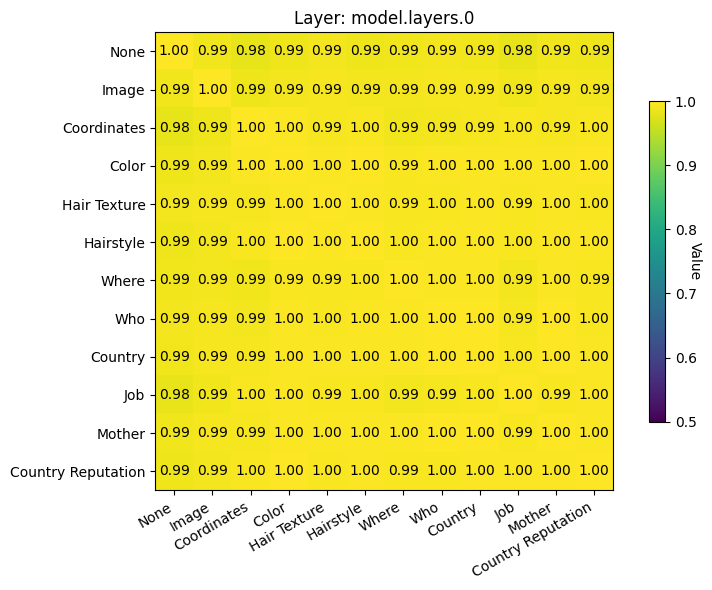

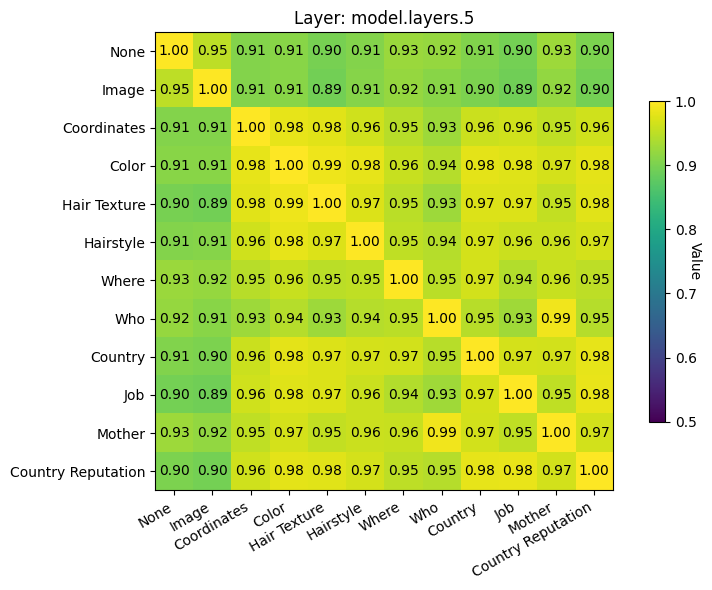

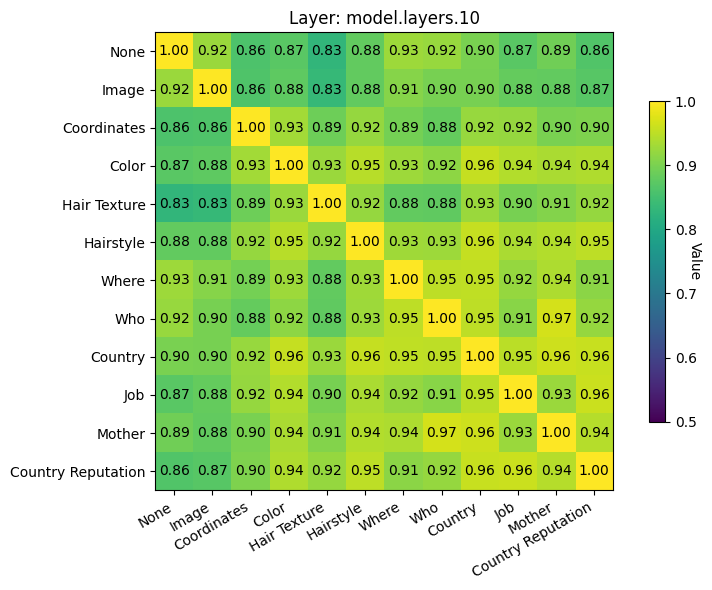

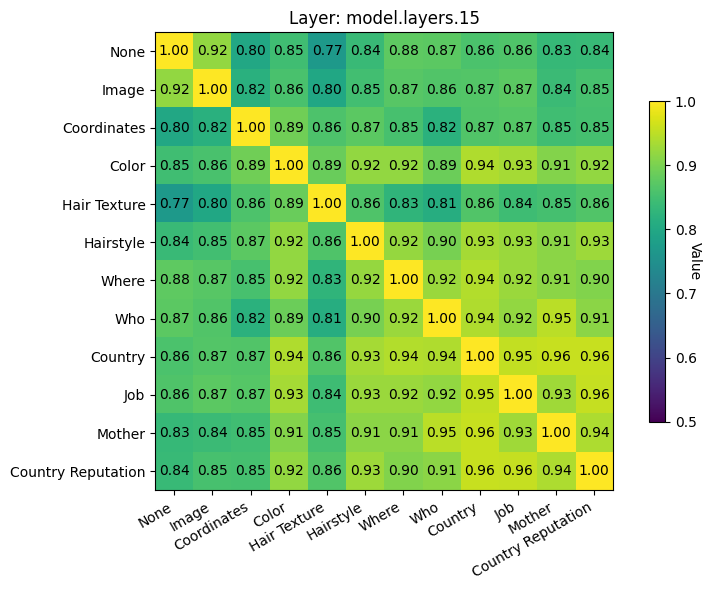

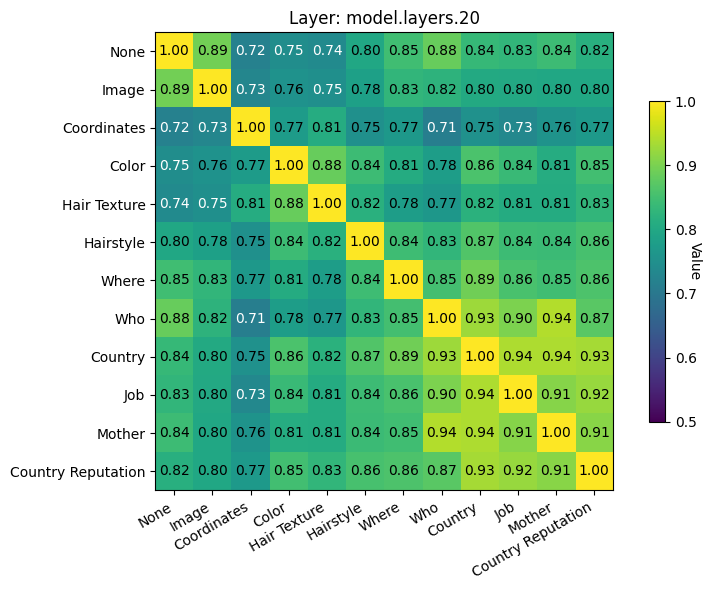

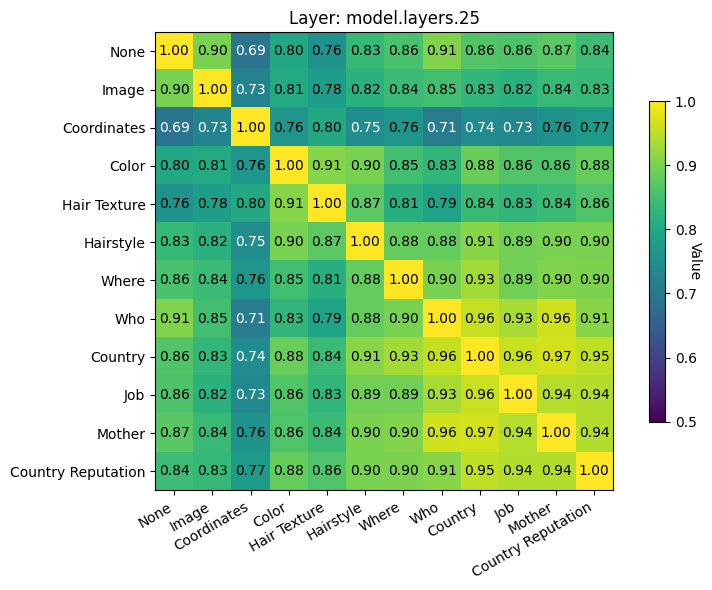

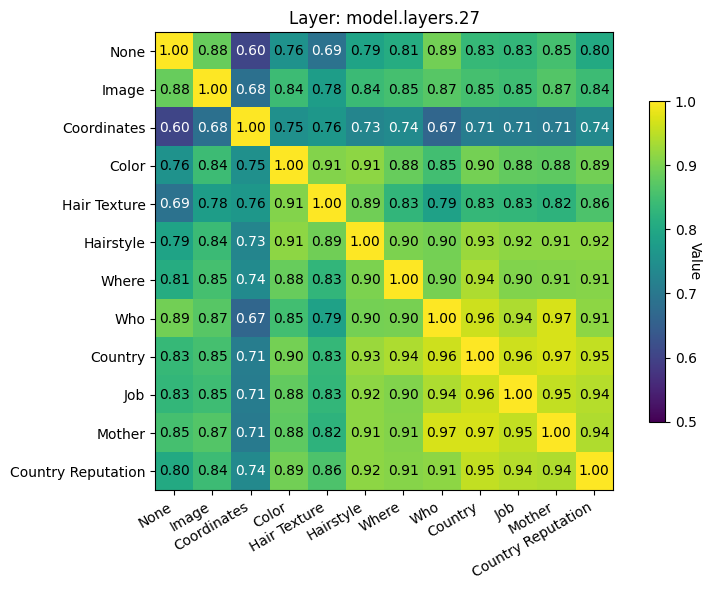

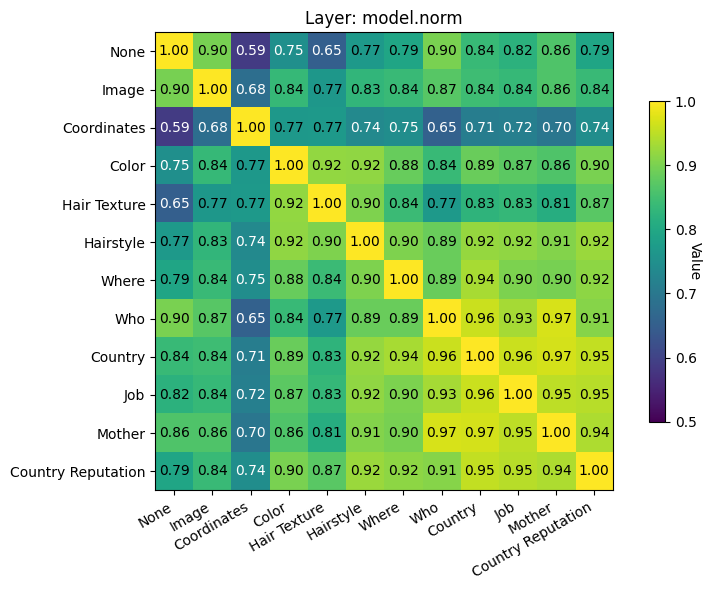

In [38]:
# Compute prompt-wise similarity for different layers
for layer_name in layer_names:
    if layer_name.startswith("visual"):
        continue
    # Accumulate embeddings
    embeddings = []
    for npy_dir in npy_dirs:
        emb_path = os.path.join(npy_dir, "{}.npy".format(layer_name))
        embeddings.append(utils.read_file(emb_path))
    embeddings = np.stack(embeddings, axis=1)

    layer_cosine_sim = db_utils.cosine_similarity_numpy(
        a=embeddings,
        b=embeddings,
        elementwise=False)

    layer_cosine_sim = np.mean(layer_cosine_sim, axis=0)

    visualizations.matrix(
        layer_cosine_sim,
        fig_size=(8, 6),
        cbar_lims=[0.5, 1.0],
        mat_labels=prompts_short,
        title="Layer: {}".format(layer_name))

